---
## Clustering <br> <font size=3.4> Dataset:EastWestAirlines.csv<br><font size=2>Perform clustering for the airlines data to obtain optimum number of clusters.Draw the inferences from the clusters obtained.<br>Data Description:<br>The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers<br>ID -- Unique ID<br>Balance -- Number of miles eligible for award travel<br>Qual mile -- Number of miles counted as qualifying for Topflight status<br>cc1 miles -- Number of miles earned with freq. flyer credit card in the past 12 months<br>cc2 miles -- Number of miles earned with Rewards credit card in the past 12 months<br>cc3 miles -- Number of miles earned with Small Business credit card in the past 12 months,<br>1 = under 5,000 ,  2 = 5,000 - 10,000 , 3 = 10,001 - 25,000 , 4 = 25,001 - 50,000 , 5 = over 50,000<br>Bonus miles -- Number of miles earned from non-flight bonus transactions in the past 12 months<br>Bonus trans -- Number of non-flight bonus transactions in the past 12 months<br>Flight_miles 12mo -- Number of flight miles in the past 12 months<br>Flight trans 12 -- Number of flight transactions in the past 12 months<br>Days since enrolled -- Number of days since enrolled in flier program<br>Award -- whether that person had award flight (free flight) or not
---

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

In [2]:
df= pd.read_csv ('/Users/Ketan/Downloads/Data Science/Assignments/Clustering/EastWestAirlines.csv')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.drop(['ID#'],axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,:])

In [9]:
X = df_norm

## K Means Clustering

### Using with Elbow method to find the optimum no of clusters

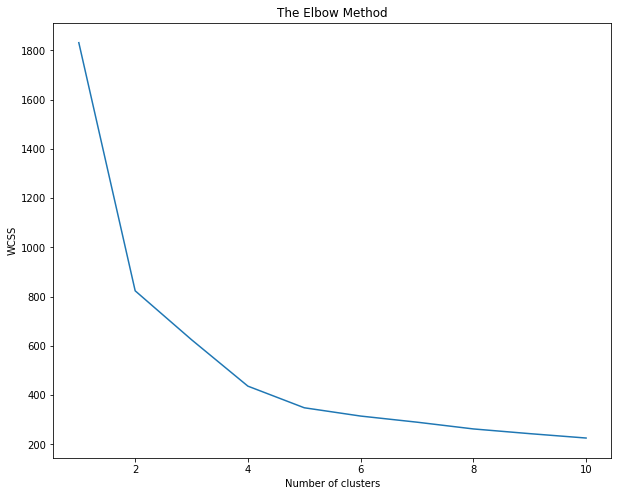

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 200)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As per this plot, optimum no of clusters = 4

To confirm the same, let's use Silhouette score method

In [11]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.45748332355557725
Silhouette score for k(clusters) = 4 is 0.46521656243534165
Silhouette score for k(clusters) = 5 is 0.4331034289974864
Silhouette score for k(clusters) = 6 is 0.38797950408463444
Silhouette score for k(clusters) = 7 is 0.38215573404485803
Silhouette score for k(clusters) = 8 is 0.37942691016839863
Silhouette score for k(clusters) = 9 is 0.38309139839147066
Silhouette score for k(clusters) = 10 is 0.3394967467810052
Silhouette score for k(clusters) = 11 is 0.3418204030420695
Silhouette score for k(clusters) = 12 is 0.3477075501145482


As per the Silhouette score also, K= 4 is the optimum number of clusters

In [12]:
#Hence
model=KMeans(n_clusters=4) 
model.fit(df_norm)
model.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [13]:
km = pd.Series(model.labels_) 
df['kclust']= km 
df.iloc[:,1:7].groupby(df.kclust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans
kclust,,,,,,
0,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733
1,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666
2,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969
3,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208


Text(0.5, 0.98, 'Relative comparison of customers in respective clusters')

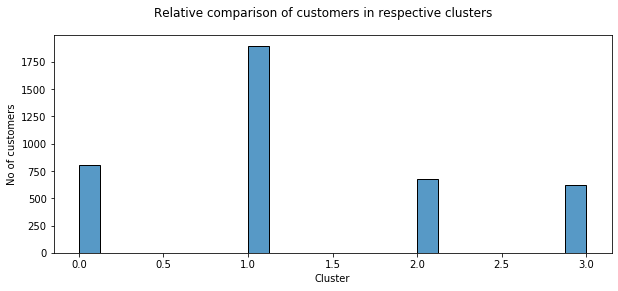

In [14]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of customers in respective clusters')

## Hierarchical Clustering

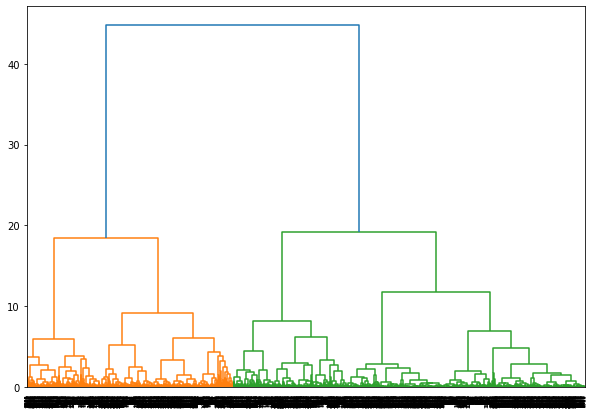

In [15]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

#### The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. If we decide a threshold of 15 and cut the dendrogram:

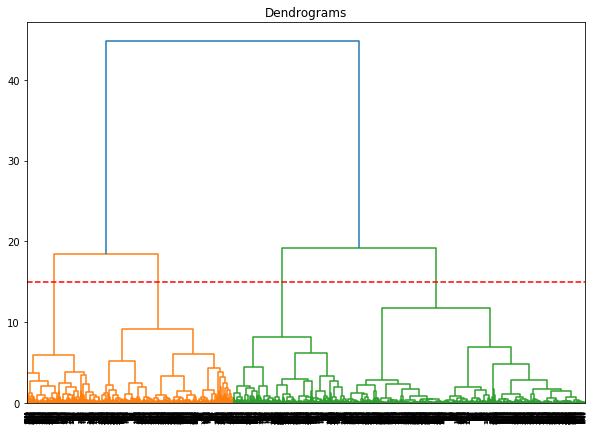

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [17]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [18]:
y_hc = hc.fit_predict(df)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [19]:
Clusters.value_counts()

Clusters
0           3994
2              3
3              1
1              1
dtype: int64

In [ ]:
Clusters

In [21]:
df['hc_clust']= Clusters
df.iloc[:,1:7].groupby(df.hc_clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans
hc_clust,,,,,,
0,142.382073,2.058338,1.014522,1.012268,17117.363545,11.585628
1,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000
2,1644.666667,3.000000,1.000000,1.000000,29243.000000,19.666667
3,2706.000000,5.000000,1.000000,1.000000,90653.000000,32.000000


Text(0.5, 0.98, 'Relative comparison of customers in respective clusters')

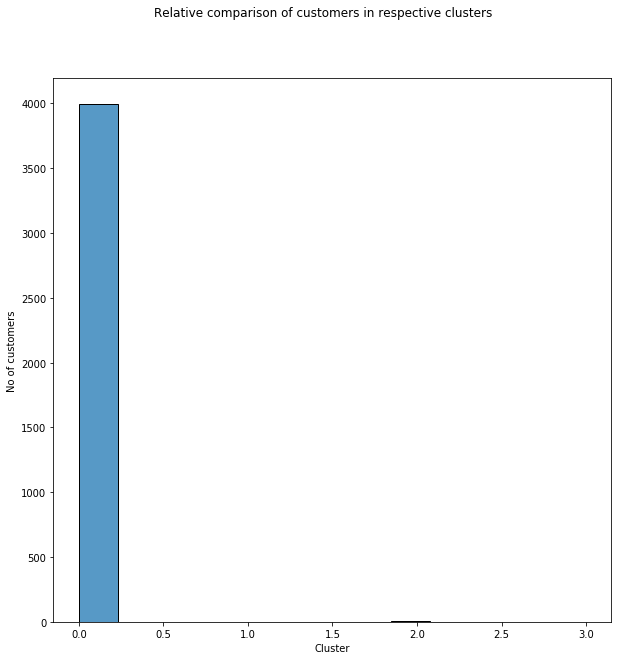

In [24]:
plt.figure(figsize=(10,10))
sns.histplot (x='hc_clust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of customers in respective clusters')